// Reference R code from https://www.galitshmueli.com/system/files/ASMB_901_rev.pdf
// Generate a p-dimensional Poisson
// p = the dimension of the distribution #samples =thenumberofobservations
// R = correlation matrix p X p
// lambda =ratevectorpX1
GenerateMultivariatePoisson<-function(p, samples, R, lambda){ normal_mu=rep(0, p)
normal = mvrnorm(samples, normal_mu, R)
unif=pnorm(normal)
pois=t(qpois(t(unif), lambda))
   return(pois)
}
// Correct initial correlation between a # certain pair of series
// lambda1 =rateoffirstseries
// lambda2 =rateofsecondseries
// r = desired correlation CorrectInitialCorrel<-function(lambda1, lambda2, r){
samples=500
u = runif(samples, 0, 1)
lambda=c(lambda1,lambda2)
maxcor=cor(qpois(u, lambda1), qpois(u, lambda2)) mincor=cor(qpois(u, lambda1), qpois(1-u, lambda2)) a=-maxcor*mincor/(maxcor+mincor) b=log((maxcor+a)/a, exp(1))
c=-a
corrected=log((r+a)/a, exp(1))/b corrected=ifelse ((corrected>1 | corrected<(-1)),
NA, corrected) return(corrected)


In [35]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import time

In [36]:
def generateMultivariatePoisson(p,R,lambdas,adj=True,seed=1):
    """
    generateMultivariatePoisson generates a sample of a [p]-dimensional Poisson distribution with 
    marginal rates [lambdas] and p x p correlation matrix [R] where R(i,j)=1 for i=j using a modified 
    NORTA approach.
    - calculate feasible correlation range 
    - computer parameters for correlation mapping and apply
    - generate multivariate normals with means 0 and variances 1 with an adjusted correlation vector
    - apply the inverse cdf of N(0,1) to each component of the multivariate sample to get a U(0,1)
    - for each generated U(0,1), 
        input this value into the inverse of the poisson parametrized by the corresponding lambda
    - output p-dim poisson vector with rates lambdas
    """
    np.random.seed(seed)
    # adjust correlations by applying mapping to each pair of bivariates
    corrected = np.copy(R)

    if adj:
        for i in range(p):
            for j in range(p):
                if i != j:
                    np.random.seed(seed)
                    # identify feasible correlation range
                    u = np.random.uniform(size=100000)
                    x = poisson.ppf(u,mu=lambdas[i])
                    y = poisson.ppf(u,mu=lambdas[j])
                    z = poisson.ppf(1-u,mu=lambdas[j])
                    maxcor = pearsonr(x,y)[0] # pearson r outputs (corr coef, p-value)
                    mincor = pearsonr(x,z)[0]

                    # compute parameters for mapping
                    a = -maxcor * mincor / (maxcor + mincor)
                    b = np.log((maxcor+a)/a)
                    c = -a
                    
                    # apply exponential mapping
                    orgCorr = R[i,j]
                    adjCorr = np.log((orgCorr-c)/a)/b

                    if (adjCorr <= 1) and (adjCorr >= -1):
                        corrected[i,j] = adjCorr
                        corrected[j,i] = adjCorr
    
    # run the NORTA method using an adjusted covariance matrix
    normal_mu = np.zeros(p)
    normal = np.random.multivariate_normal(mean=normal_mu,cov=corrected)
    unif = norm.cdf(normal)
    pois = poisson.ppf(unif,mu=lambdas)
    return pois


# Lambda < 1 Experiments

In [3]:
# experiment 1 bivariate case lambda=(0.1,0.1)
ex1Time = []
p = 2
n=50
lambdas = [0.1,0.1]
corrs1 = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex1dim1s = [] # dim 1 of poisson vector
    ex1dim2s = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=True)
        ex1Time.append(time.time() - start)
        ex1dim1s.append(tmp[0])
        ex1dim2s.append(tmp[1])
    corrs1.append(pearsonr(ex1dim1s,ex1dim2s)[0])

# experiment 2 bivariate case lambda=(0.1,0.5)
ex2Time = []
p = 2
n=50
lambdas = [0.1,0.5]
corrs2 = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex2dim1s = [] # dim 1 of poisson vector
    ex2dim2s = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=True)
        ex2Time.append(time.time() - start)
        ex2dim1s.append(tmp[0])
        ex2dim2s.append(tmp[1])
    corrs2.append(pearsonr(ex2dim1s,ex2dim2s)[0])

# experiment 3 bivariate case lambda=(0.5,0.5)
ex3Time = []
p = 2
n=50
lambdas = [0.5,0.5]
corrs3 = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex3dim1s = [] # dim 1 of poisson vector
    ex3dim2s = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=True)
        ex3Time.append(time.time() - start)
        ex3dim1s.append(tmp[0])
        ex3dim2s.append(tmp[1])
    corrs3.append(pearsonr(ex3dim1s,ex3dim2s)[0])

# experiment 4 bivariate case lambda=(0.5,0.9)
ex4Time = []
p = 2
n=50
lambdas = [0.5,0.9]
corrs4 = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex4dim1s = [] # dim 1 of poisson vector
    ex4dim2s = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=True)
        ex4Time.append(time.time() - start)
        ex4dim1s.append(tmp[0])
        ex4dim2s.append(tmp[1])
    corrs4.append(pearsonr(ex4dim1s,ex4dim2s)[0])

# experiment 5 bivariate case lambda=(0.9,0.9)
ex5Time = []
p = 2
n=50
lambdas = [0.9,0.9]
corrs5 = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex5dim1s = [] # dim 1 of poisson vector
    ex5dim2s = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=True)
        ex5Time.append(time.time() - start)
        ex5dim1s.append(tmp[0])
        ex5dim2s.append(tmp[1])
    corrs5.append(pearsonr(ex5dim1s,ex5dim2s)[0])

<ipython-input-2-5a5054894482>:38: RuntimeWarning: invalid value encountered in log
  adjCorr = np.log((orgCorr-c)/a)/b


Average running time:

 - experiment 1: 0.37733438968658445 seconds.)

 - experiment 2: 0.5017723302841186 seconds.)

 - experiment 3: 0.6188594861030579 seconds.)

 - experiment 4: 0.7242574920654297 seconds.)

 - experiment 5: 0.816554500579834 seconds.)

Mean squared error:

 - experiment 1: mse of 0.15376374811502125.

 - experiment 2: mse of 0.12437502276549976.

 - experiment 3: mse of 0.04542165798581659.

 - experiment 4: mse of 0.039072600834805585.

 - experiment 5: mse of 0.028019562787059547.


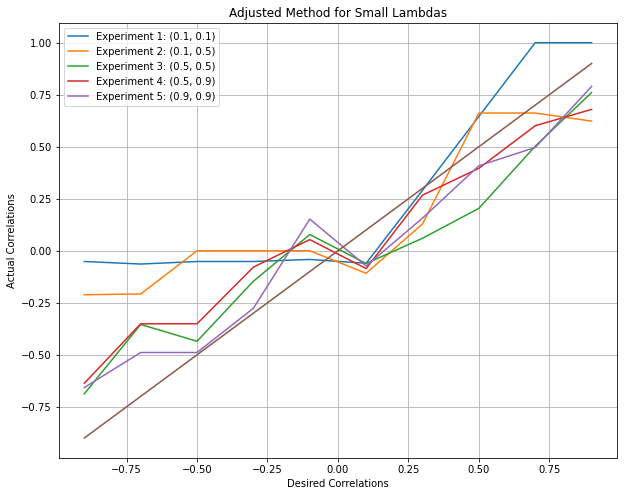

In [33]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.title('Adjusted Method for Small Lambdas')
x = np.arange(-0.9,1,0.2)
plt.plot(x,corrs1,label='Experiment 1: (0.1, 0.1)')
plt.plot(x,corrs2,label='Experiment 2: (0.1, 0.5)')
plt.plot(x,corrs3,label='Experiment 3: (0.5, 0.5)')
plt.plot(x,corrs4,label='Experiment 4: (0.5, 0.9)')
plt.plot(x,corrs5,label='Experiment 5: (0.9, 0.9)')
plt.plot(x,x)
plt.grid(True)
plt.legend(loc="upper left")
plt.xlabel("Desired Correlations")
plt.ylabel("Actual Correlations")
plt.savefig('adjSmall.png')
print(f'Average running time:')
print(f'\n - experiment 1: {np.mean(ex1Time)} seconds.)')
print(f'\n - experiment 2: {np.mean(ex2Time)} seconds.)')
print(f'\n - experiment 3: {np.mean(ex3Time)} seconds.)')
print(f'\n - experiment 4: {np.mean(ex4Time)} seconds.)')
print(f'\n - experiment 5: {np.mean(ex5Time)} seconds.)')
print(f'\nMean squared error:')
print(f'\n - experiment 1: mse of {np.mean((corrs1 - x)**2)}.')
print(f'\n - experiment 2: mse of {np.mean((corrs2 - x)**2)}.')
print(f'\n - experiment 3: mse of {np.mean((corrs3 - x)**2)}.')
print(f'\n - experiment 4: mse of {np.mean((corrs4 - x)**2)}.')
print(f'\n - experiment 5: mse of {np.mean((corrs5 - x)**2)}.')

In [17]:
# experiment 1 bivariate case lambda=(0.1,0.1) unadjusted
ex1Timeu = []
p = 2
n=50
lambdas = [0.1,0.1]
corrs1u = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex1dim1su = [] # dim 1 of poisson vector
    ex1dim2su = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=False)
        ex1Timeu.append(time.time() - start)
        ex1dim1su.append(tmp[0])
        ex1dim2su.append(tmp[1])
    corrs1u.append(pearsonr(ex1dim1su,ex1dim2su)[0])

# experiment 2 bivariate case lambda=(0.1,0.5) unadjusted
ex2Timeu = []
p = 2
n=50
lambdas = [0.1,0.5]
corrs2u = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex2dim1su = [] # dim 1 of poisson vector
    ex2dim2su = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=False)
        ex2Timeu.append(time.time() - start)
        ex2dim1su.append(tmp[0])
        ex2dim2su.append(tmp[1])
    corrs2u.append(pearsonr(ex2dim1su,ex2dim2su)[0])

# experiment 3 bivariate case lambda=(0.5,0.5) unadjusted
ex3Timeu = []
p = 2
n=50
lambdas = [0.5,0.5]
corrs3u = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex3dim1su = [] # dim 1 of poisson vector
    ex3dim2su = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=False)
        ex3Timeu.append(time.time() - start)
        ex3dim1su.append(tmp[0])
        ex3dim2su.append(tmp[1])
    corrs3u.append(pearsonr(ex3dim1su,ex3dim2su)[0])
    
# experiment 4 bivariate case lambda=(0.5,0.9) unadjusted
ex4Timeu = []
p = 2
n=50
lambdas = [0.5,0.9]
corrs4u = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex4dim1su = [] # dim 1 of poisson vector
    ex4dim2su = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=False)
        ex4Timeu.append(time.time() - start)
        ex4dim1su.append(tmp[0])
        ex4dim2su.append(tmp[1])
    corrs4u.append(pearsonr(ex4dim1su,ex4dim2su)[0])

# experiment 5 bivariate case lambda=(0.9,0.9) unadjusted
ex5Timeu = []
p = 2
n=50
lambdas = [0.9,0.9]
corrs5u = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex5dim1su = [] # dim 1 of poisson vector
    ex5dim2su = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=False)
        ex5Timeu.append(time.time() - start)
        ex5dim1su.append(tmp[0])
        ex5dim2su.append(tmp[1])
    corrs5u.append(pearsonr(ex5dim1su,ex5dim2su)[0])

Average running time:

 - experiment 1: 0.00047565746307373045 seconds.)

 - experiment 2: 0.00041307353973388673 seconds.)

 - experiment 3: 0.00045835542678833007 seconds.)

 - experiment 4: 0.0004192466735839844 seconds.)

 - experiment 5: 0.000498234748840332 seconds.)

Mean squared error:

 - experiment 1: mse of 0.1587675833191264.

 - experiment 2: mse of 0.13761034784648357.

 - experiment 3: mse of 0.07079170668589174.

 - experiment 4: mse of 0.05918496540737152.

 - experiment 5: mse of 0.043125379674867514.


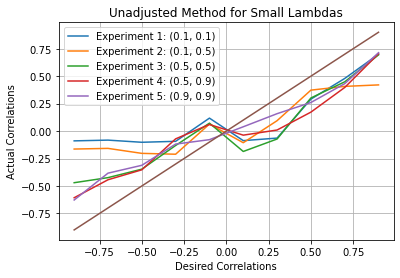

In [32]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)
plt.title('Unadjusted Method for Small Lambdas')
x = np.arange(-0.9,1,0.2)
plt.plot(x,corrs1u,label='Experiment 1: (0.1, 0.1)')
plt.plot(x,corrs2u,label='Experiment 2: (0.1, 0.5)')
plt.plot(x,corrs3u,label='Experiment 3: (0.5, 0.5)')
plt.plot(x,corrs4u,label='Experiment 4: (0.5, 0.9)')
plt.plot(x,corrs5u,label='Experiment 5: (0.9, 0.9)')
plt.plot(x,x)
plt.grid(True)
plt.legend(loc="upper left")
plt.xlabel("Desired Correlations")
plt.ylabel("Actual Correlations")
plt.savefig('unadjSmall.png')
print(f'Average running time:')
print(f'\n - experiment 1: {np.mean(ex1Timeu)} seconds.)')
print(f'\n - experiment 2: {np.mean(ex2Timeu)} seconds.)')
print(f'\n - experiment 3: {np.mean(ex3Timeu)} seconds.)')
print(f'\n - experiment 4: {np.mean(ex4Timeu)} seconds.)')
print(f'\n - experiment 5: {np.mean(ex5Timeu)} seconds.)')

print(f'\nMean squared error:')
print(f'\n - experiment 1: mse of {np.mean((corrs1u - x)**2)}.')
print(f'\n - experiment 2: mse of {np.mean((corrs2u - x)**2)}.')
print(f'\n - experiment 3: mse of {np.mean((corrs3u - x)**2)}.')
print(f'\n - experiment 4: mse of {np.mean((corrs4u - x)**2)}.')
print(f'\n - experiment 5: mse of {np.mean((corrs5u - x)**2)}.')

# Lambda >= 1 Experiments

In [22]:
# experiment 6 bivariate case lambda=(1,1) adj
ex6Time = []
p = 2
n=50
lambdas = [1,1]
corrs6 = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex6dim1s = [] # dim 1 of poisson vector
    ex6dim2s = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=True)
        ex6Time.append(time.time() - start)
        ex6dim1s.append(tmp[0])
        ex6dim2s.append(tmp[1])
    corrs6.append(pearsonr(ex6dim1s,ex6dim2s)[0])

# experiment 7 bivariate case lambda=(1,10) adj
ex7Time = []
p = 2
n=50
lambdas = [1,10]
corrs7 = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex7dim1s = [] # dim 1 of poisson vector
    ex7dim2s = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=True)
        ex7Time.append(time.time() - start)
        ex7dim1s.append(tmp[0])
        ex7dim2s.append(tmp[1])
    corrs7.append(pearsonr(ex7dim1s,ex7dim2s)[0])

# experiment 8 bivariate case lambda=(10,10) adj
ex8Time = []
p = 2
n=50
lambdas = [10,10]
corrs8 = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex8dim1s = [] # dim 1 of poisson vector
    ex8dim2s = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=True)
        ex8Time.append(time.time() - start)
        ex8dim1s.append(tmp[0])
        ex8dim2s.append(tmp[1])
    corrs8.append(pearsonr(ex8dim1s,ex8dim2s)[0])
    
# experiment 9 bivariate case lambda=(10,100) adj
ex9Time = []
p = 2
n=50
lambdas = [10,100]
corrs9 = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex9dim1s = [] # dim 1 of poisson vector
    ex9dim2s = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=True)
        ex9Time.append(time.time() - start)
        ex9dim1s.append(tmp[0])
        ex9dim2s.append(tmp[1])
    corrs9.append(pearsonr(ex9dim1s,ex9dim2s)[0])

# experiment 10 bivariate case lambda=(100,100) adj
ex10Time = []
p = 2
n=50
lambdas = [100,100]
corrs10 = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex10dim1s = [] # dim 1 of poisson vector
    ex10dim2s = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=True)
        ex10Time.append(time.time() - start)
        ex10dim1s.append(tmp[0])
        ex10dim2s.append(tmp[1])
    corrs10.append(pearsonr(ex10dim1s,ex10dim2s)[0])

Average running time:

 - experiment 6: 0.8146674523353576 seconds.)

 - experiment 7: 1.09484956407547 seconds.)

 - experiment 8: 1.3833858184814454 seconds.)

 - experiment 9: 3.493221818447113 seconds.)

 - experiment 10: 1.603278772354126 seconds.)

Mean squared error:

 - experiment 6: mse of 0.032472943214369575.

 - experiment 7: mse of 0.02484995361054628.

 - experiment 8: mse of 0.03360335551534145.

 - experiment 9: mse of 0.033108717466495415.

 - experiment 10: mse of 0.03620176135057511.


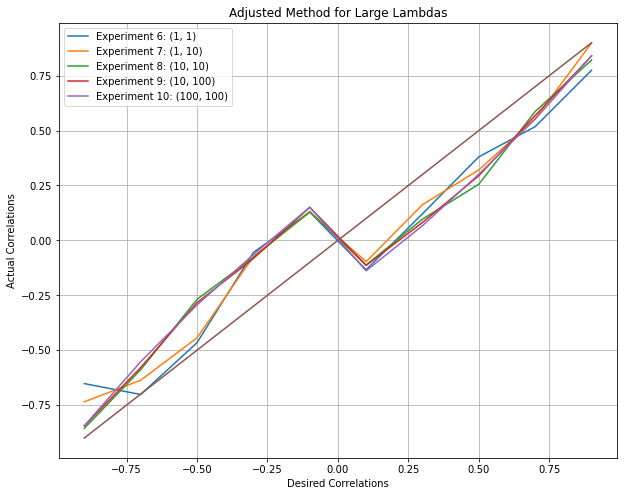

In [31]:
x = np.arange(-0.9,1,0.2)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.title('Adjusted Method for Large Lambdas')
x = np.arange(-0.9,1,0.2)
plt.plot(x,corrs6,label='Experiment 6: (1, 1)')
plt.plot(x,corrs7,label='Experiment 7: (1, 10)')
plt.plot(x,corrs8,label='Experiment 8: (10, 10)')
plt.plot(x,corrs9,label='Experiment 9: (10, 100)')
plt.plot(x,corrs10,label='Experiment 10: (100, 100)')
plt.plot(x,x)
plt.grid(True)
plt.legend(loc="upper left")
plt.xlabel("Desired Correlations")
plt.ylabel("Actual Correlations")
plt.savefig('adjLarge.png')
print(f'Average running time:')
print(f'\n - experiment 6: {np.mean(ex6Time)} seconds.)')
print(f'\n - experiment 7: {np.mean(ex7Time)} seconds.)')
print(f'\n - experiment 8: {np.mean(ex8Time)} seconds.)')
print(f'\n - experiment 9: {np.mean(ex9Time)} seconds.)')
print(f'\n - experiment 10: {np.mean(ex10Time)} seconds.)')
print(f'\nMean squared error:')
print(f'\n - experiment 6: mse of {np.mean((corrs6 - x)**2)}.')
print(f'\n - experiment 7: mse of {np.mean((corrs7 - x)**2)}.')
print(f'\n - experiment 8: mse of {np.mean((corrs8 - x)**2)}.')
print(f'\n - experiment 9: mse of {np.mean((corrs9 - x)**2)}.')
print(f'\n - experiment 10: mse of {np.mean((corrs10 - x)**2)}.')

In [24]:
# experiment 6 bivariate case lambda=(1,1) adj
ex6Timeu = []
p = 2
n=50
lambdas = [1,1]
corrs6u = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex6dim1su = [] # dim 1 of poisson vector
    ex6dim2su = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=False)
        ex6Timeu.append(time.time() - start)
        ex6dim1su.append(tmp[0])
        ex6dim2su.append(tmp[1])
    corrs6u.append(pearsonr(ex6dim1su,ex6dim2su)[0])

# experiment 7 bivariate case lambda=(1,10) adj
ex7Timeu = []
p = 2
n=50
lambdas = [1,10]
corrs7u = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex7dim1su = [] # dim 1 of poisson vector
    ex7dim2su = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=False)
        ex7Timeu.append(time.time() - start)
        ex7dim1su.append(tmp[0])
        ex7dim2su.append(tmp[1])
    corrs7u.append(pearsonr(ex7dim1su,ex7dim2su)[0])

# experiment 8 bivariate case lambda=(10,10) adj
ex8Timeu = []
p = 2
n=50
lambdas = [10,10]
corrs8u = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex8dim1su = [] # dim 1 of poisson vector
    ex8dim2su = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=False)
        ex8Timeu.append(time.time() - start)
        ex8dim1su.append(tmp[0])
        ex8dim2su.append(tmp[1])
    corrs8u.append(pearsonr(ex8dim1su,ex8dim2su)[0])
    
# experiment 9 bivariate case lambda=(10,100) adj
ex9Timeu = []
p = 2
n=50
lambdas = [10,100]
corrs9u = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex9dim1su = [] # dim 1 of poisson vector
    ex9dim2su = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=False)
        ex9Timeu.append(time.time() - start)
        ex9dim1su.append(tmp[0])
        ex9dim2su.append(tmp[1])
    corrs9u.append(pearsonr(ex9dim1su,ex9dim2su)[0])

# experiment 10 bivariate case lambda=(100,100) adj
ex10Timeu = []
p = 2
n=50
lambdas = [100,100]
corrs10u = []
for j in np.arange(-0.9,1,0.2):
    np.random.seed(123)
    R = np.array([[1,j],[j,1]])
    ex10dim1su = [] # dim 1 of poisson vector
    ex10dim2su = [] # dim 2 of poisson vector
    for i in range(n):
        start = time.time()
        tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=False)
        ex10Timeu.append(time.time() - start)
        ex10dim1su.append(tmp[0])
        ex10dim2su.append(tmp[1])
    corrs10u.append(pearsonr(ex10dim1su,ex10dim2su)[0])

Average running time:

 - experiment 6: 0.0003140883445739746 seconds.)

 - experiment 7: 0.0002994222640991211 seconds.)

 - experiment 8: 0.0003044581413269043 seconds.)

 - experiment 9: 0.00031306552886962893 seconds.)

 - experiment 10: 0.0003099102973937988 seconds.)

Mean squared error:

 - experiment 6: mse of 0.03592136537041287.

 - experiment 7: mse of 0.020735316195350444.

 - experiment 8: mse of 0.0060203998073703755.

 - experiment 9: mse of 0.0057188883118990275.

 - experiment 10: mse of 0.004940838189847633.


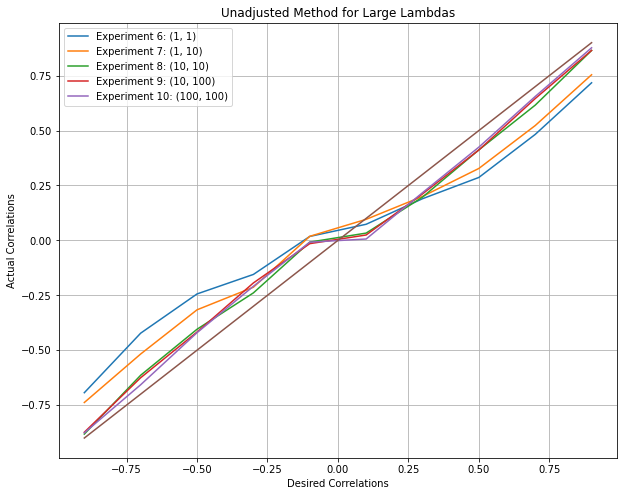

In [30]:
x = np.arange(-0.9,1,0.2)
x = np.arange(-0.9,1,0.2)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.title('Unadjusted Method for Large Lambdas')
x = np.arange(-0.9,1,0.2)
plt.plot(x,corrs6u,label='Experiment 6: (1, 1)')
plt.plot(x,corrs7u,label='Experiment 7: (1, 10)')
plt.plot(x,corrs8u,label='Experiment 8: (10, 10)')
plt.plot(x,corrs9u,label='Experiment 9: (10, 100)')
plt.plot(x,corrs10u,label='Experiment 10: (100, 100)')
plt.plot(x,x)
plt.grid(True)
plt.legend(loc="upper left")
plt.xlabel("Desired Correlations")
plt.ylabel("Actual Correlations")
plt.savefig('unadjLarge.png')
print(f'Average running time:')
print(f'\n - experiment 6: {np.mean(ex6Timeu)} seconds.)')
print(f'\n - experiment 7: {np.mean(ex7Timeu)} seconds.)')
print(f'\n - experiment 8: {np.mean(ex8Timeu)} seconds.)')
print(f'\n - experiment 9: {np.mean(ex9Timeu)} seconds.)')
print(f'\n - experiment 10: {np.mean(ex10Timeu)} seconds.)')
print(f'\nMean squared error:')
print(f'\n - experiment 6: mse of {np.mean((corrs6u - x)**2)}.')
print(f'\n - experiment 7: mse of {np.mean((corrs7u - x)**2)}.')
print(f'\n - experiment 8: mse of {np.mean((corrs8u - x)**2)}.')
print(f'\n - experiment 9: mse of {np.mean((corrs9u - x)**2)}.')
print(f'\n - experiment 10: mse of {np.mean((corrs10u - x)**2)}.')

In [39]:
p = 2
n = 10000
lambdas = [10,100]
np.random.seed(123)
R = np.array([[1,0.4],[0.4,1]])
dim1s = [] # dim 1 of poisson vector
dim2s = [] # dim 2 of poisson vector
for i in range(n):
    tmp = generateMultivariatePoisson(p,R,lambdas,seed=i,adj=False)
    dim1s.append(tmp[0])
    dim2s.append(tmp[1])

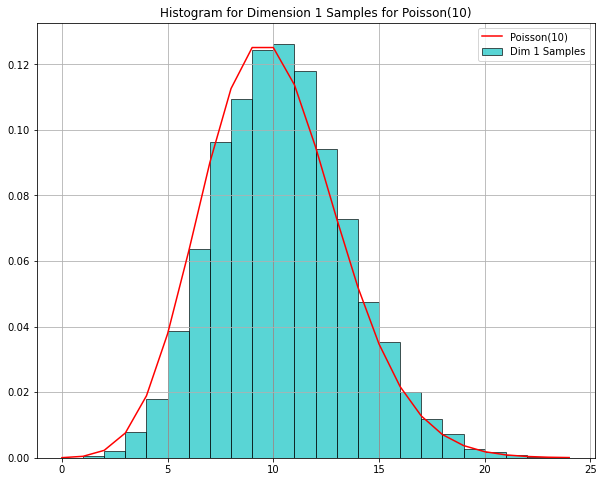

In [92]:
x = np.arange(0,25)
y = poisson.pmf(x,mu=10)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
result = plt.hist(dim1s, bins=22, color='c', edgecolor='k', alpha=0.65, density=True,label='Dim 1 Samples')
plt.title('Histogram for Dimension 1 Samples for Poisson(10)')
plt.grid(True) 
plt.plot(x,y,color='r',label='Poisson(10)')
plt.legend()
plt.savefig('dim1Hist.png')

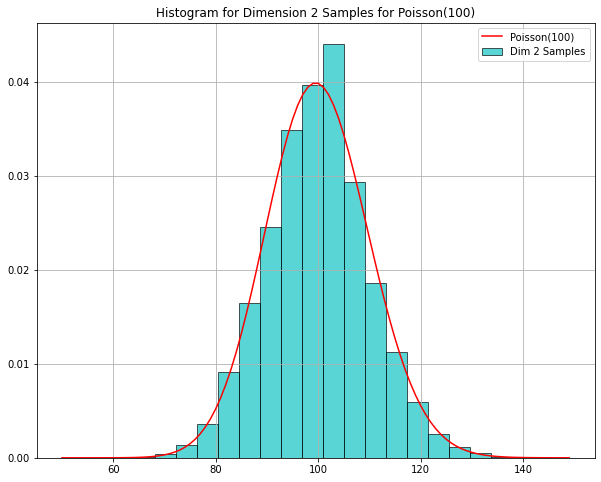

In [93]:
x = np.arange(50,150)
y = poisson.pmf(x,mu=100)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
result = plt.hist(dim2s, bins=19, color='c', edgecolor='k', alpha=0.65, density=True,label='Dim 2 Samples')
plt.title('Histogram for Dimension 2 Samples for Poisson(100)')
plt.grid(True) 
plt.plot(x,y,color='r',label='Poisson(100)')
plt.legend()
plt.savefig('dim2Hist.png')